**CNN Tutorial**
- Download dataset from Keras
-  Visualize data (Image/Pixels)
- Reshape the data
- Normalize the data
- Visualize the data(pixels) after normalizing
- One hot encoding the labels
- Mounting in colab and displying Image
- Build the LeNet Model
- Calculating Number of parameters
- Keras Callbacks
- Compile the model
- validation split(sklearn)
- Fit the model
- Tensorboard Visualization
- Plot the graphs
- Evaluate on test data
- Testing on individual images on test data
- Plot the confusion Matrix
- Visualizing Learned Filters


**Datasets and Pre Processing**

In [0]:
import keras
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


**Mounting**

In [0]:
import os
from google.colab import drive
drive.mount('/content/cnn')
os.chdir('/content/cnn/My Drive/CNN_Tutorial/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/cnn



**Dataset**


> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example how the data looks (each class takes three-rows):

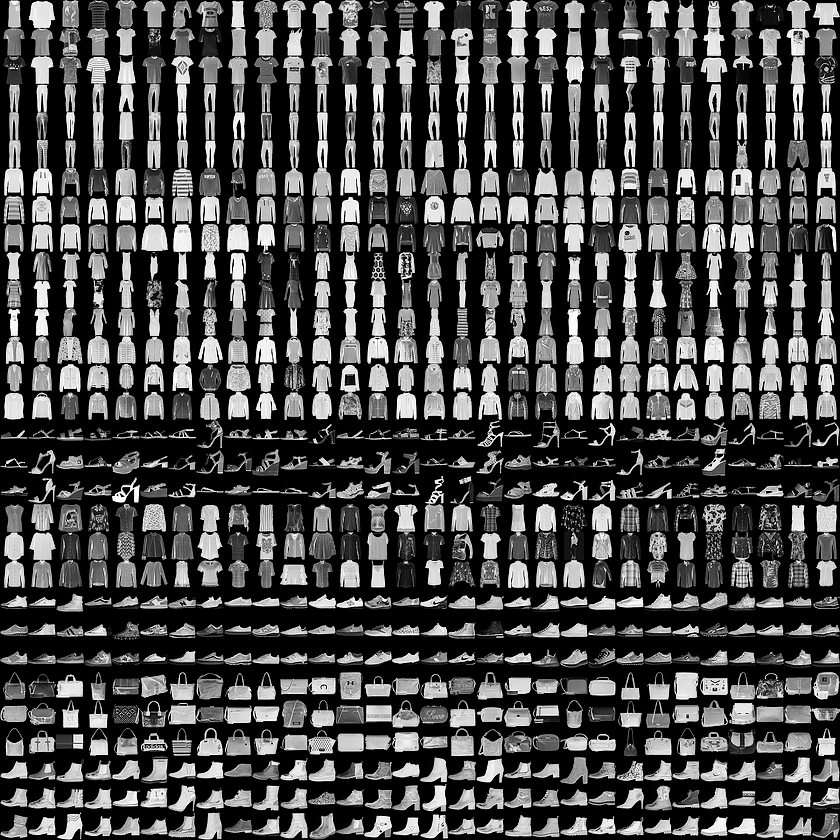

In [0]:
from IPython.display import Image,display
display(Image(filename='/content/cnn/My Drive/CNN_Tutorial/Test_Images/fashion-mnist-sprite.png',embed=True))

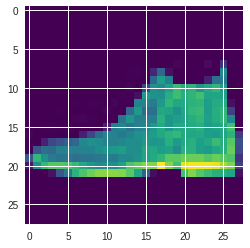

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='viridis')

In [0]:
print(xtest[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [0]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')/255
xtest = xtest.reshape(xtest.shape[0],28,28,1).astype('float32')/255

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [0]:
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
import keras
from keras import models
from keras import layers

**LeNet Model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (5,5), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)  

**Compile the model**

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split 

**Keras Callbacks**
* ModelCheckPoint
* TensorBoard
* CSVLogger
* ReduceOnPlateu

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger,ReduceLROnPlateau,LearningRateScheduler
mc = ModelCheckpoint('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Fashion_MNSIST', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/CNN_Tutorial/Models and CSV/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('/content/cnn/My Drive/CNN_Tutorial/Models and CSV/Fashion_MNSIST.csv',append=True)
rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
lrate = LearningRateScheduler(step_decay)

**Fit the model**

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, epochs=50, verbose=2,callbacks=[cv,mc,tb,rp])

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 5s - loss: 1.0308 - acc: 0.6164 - val_loss: 0.6457 - val_acc: 0.7505
Epoch 2/50
 - 2s - loss: 0.6720 - acc: 0.7442 - val_loss: 0.5401 - val_acc: 0.7846
Epoch 3/50
 - 2s - loss: 0.5906 - acc: 0.7747 - val_loss: 0.4948 - val_acc: 0.8178
Epoch 4/50
 - 2s - loss: 0.5432 - acc: 0.7943 - val_loss: 0.4514 - val_acc: 0.8348
Epoch 5/50
 - 2s - loss: 0.5092 - acc: 0.8091 - val_loss: 0.4224 - val_acc: 0.8404
Epoch 6/50
 - 2s - loss: 0.4847 - acc: 0.8205 - val_loss: 0.4019 - val_acc: 0.8496
Epoch 7/50
 - 2s - loss: 0.4665 - acc: 0.8272 - val_loss: 0.3948 - val_acc: 0.8556
Epoch 8/50
 - 2s - loss: 0.4460 - acc: 0.8353 - val_loss: 0.3779 - val_acc: 0.8608
Epoch 9/50
 - 2s - loss: 0.4363 - acc: 0.8394 - val_loss: 0.3641 - val_acc: 0.8663
Epoch 10/50
 - 2s - loss: 0.4235 - acc: 0.8434 - val_loss: 0.3592 - val_acc: 0.8663
Epoch 11/50
 - 2s - loss: 0.4119 - acc: 0.8476 - val_loss: 0.3549 - val

In [0]:
model.eavaluate(xtest,ytest)

**Loss and Acc Curves**

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(50)

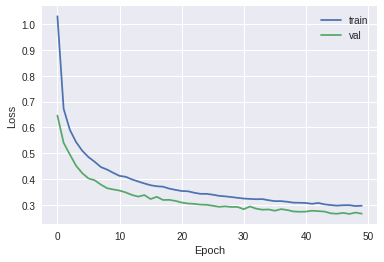

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

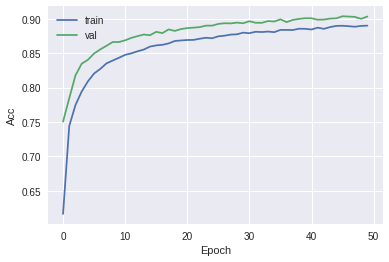

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

**Prediction**

In [0]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[8.1565581e-11 5.5619821e-11 3.8444067e-11 1.0315601e-09 2.3353354e-13
  5.4437207e-04 7.0392793e-12 5.5001755e-03 3.5483019e-10 9.9395543e-01]]
9


1 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
5 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
11 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
12 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
13 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 5
14 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 3
15 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
16 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
17 Actual is  [0. 0. 1. 0. 0. 0. 

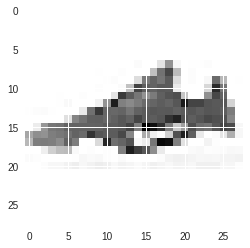

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1000):
    plt.imshow(xtest[i].reshape(28, 28),cmap='Greys')
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

**Confusion Matrix**

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85      1000
     class 1       1.00      0.97      0.98      1000
     class 2       0.83      0.87      0.85      1000
     class 3       0.89      0.92      0.90      1000
     class 4       0.85      0.80      0.82      1000
     class 5       0.98      0.97      0.97      1000
     class 6       0.73      0.67      0.70      1000
     class 7       0.92      0.98      0.95      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.98      0.94      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[882   0  11  16   3   1  81   0   6   0]
 [  0 971   0  21   1   0   5   0   2   0]
 [ 24   0 866  12  41   0  56   0   1   0]
 [ 14   1   8 920  24   0  31   0   2   0]
 [  0   1  82  41 801   0  74   0   1   0]
 [  0   0   0   0   0 968   0  28   0   4]
 [141   1  78  24  71   0 672   0  13   0]
 [  0   0   0   0   0  10   0 976   0  14]
 [  3   0   4   4   1   1   3   4 980   0]
 [  0   0   0   0   0   7   0  48   1 944]]


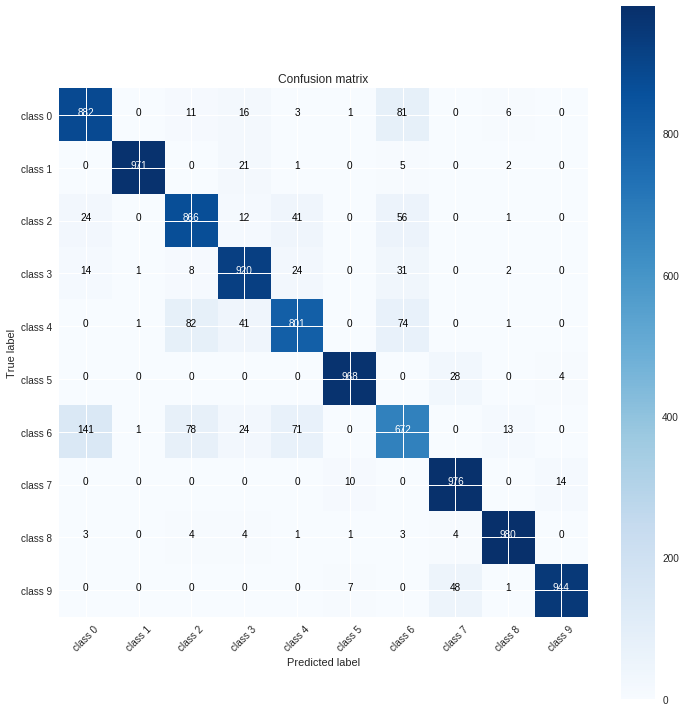

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

**Visualizing The Activations**

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))


In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
print(len(activations))
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)
print(activations[8].shape)
print(activations[9].shape)
print(activations[10].shape)
print(activations[11].shape)

12
(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 120)
(1, 84)
(1, 84)
(1, 10)


**Ist Activation (Convolution_1)**

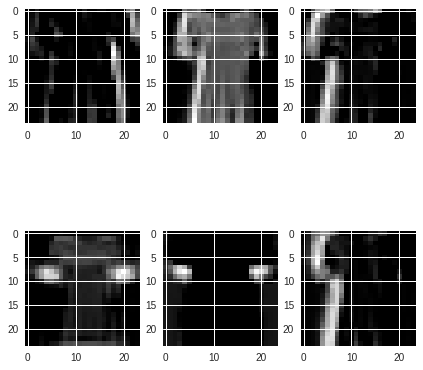

In [0]:

display_activation(activations,3,2,0)

**2nd Activation (MaxPooling_1)**

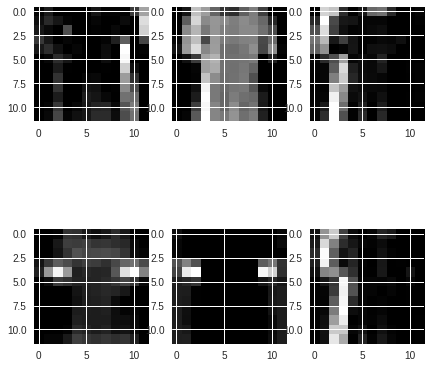

In [0]:
display_activation(activations,3,2,1)

**3rd Activation (Dropout_1)**

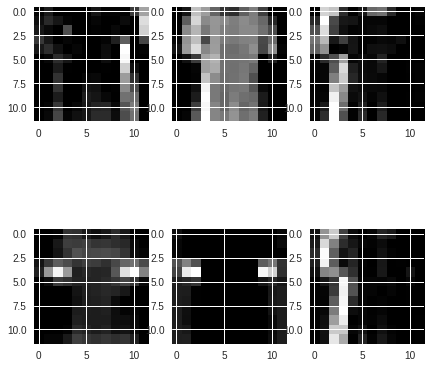

In [0]:
display_activation(activations,3,2,2)

**4th Activation (Convolution_2)**

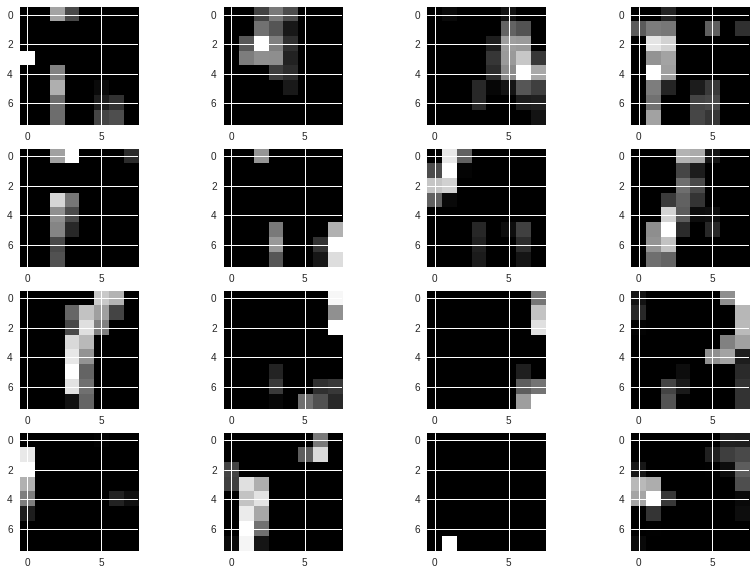

In [0]:
display_activation(activations,4,4,3)

**5th Activation (MaxPooling_2)**

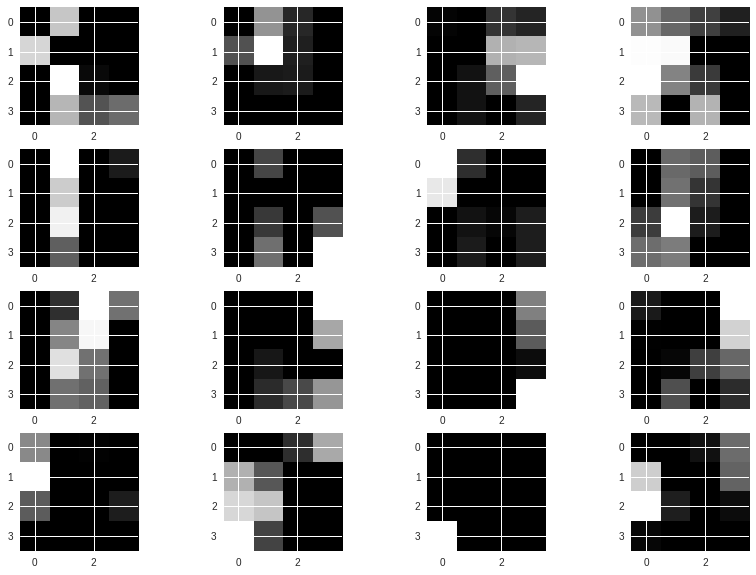

In [0]:
display_activation(activations,4,4,4)

**6th Activation (Dropout_2)**

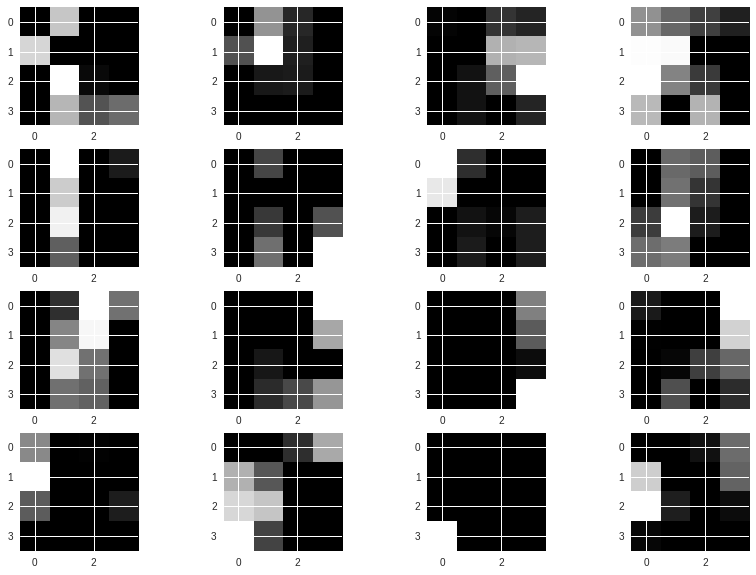

In [0]:
display_activation(activations,4,4,5)

**Classification in final layer**

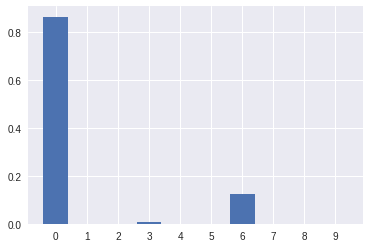

In [0]:
act_dense_3  = activations[11]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

**Visualization of filters**


.**First level Filters**

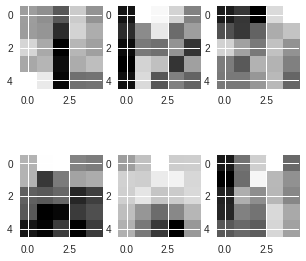

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.04 -0.01 -0.17  0.18  0.01]
 [ 0.03  0.01 -0.31  0.2   0.08]
 [ 0.21  0.07 -0.45  0.11  0.04]
 [ 0.07  0.11 -0.41  0.08  0.14]
 [ 0.34  0.27 -0.43 -0.1  -0.09]]

[[-0.14  0.2   0.19  0.14  0.02]
 [-0.1   0.03  0.16 -0.01  0.06]
 [-0.15  0.01 -0.01  0.04 -0.09]
 [-0.17  0.14  0.11 -0.09  0.06]
 [-0.14  0.15 -0.04  0.02 -0.02]]

[[-0.38 -0.29 -0.49  0.3   0.43]
 [-0.19 -0.28 -0.13  0.13  0.22]
 [ 0.27  0.09 -0.05  0.21  0.04]
 [-0.04 -0.16  0.15  0.16 -0.02]
 [-0.05 -0.05  0.06  0.18 -0.12]]

[[ 0.21  0.38  0.38  0.09  0.07]
 [ 0.21 -0.08  0.07  0.17  0.19]
 [ 0.01 -0.01  0.02 -0.13 -0.07]
 [-0.01 -0.22 -0.2  -0.08 -0.03]
 [-0.16 -0.21 -0.07 -0.21 -0.08]]

[[-0.2   0.01  0.39  0.08  0.09]
 [ 0.11  0.09  0.26  0.31  0.14]
 [ 0.09  0.23  0.04  0.07  0.16]
 [-0.01 -0.25 -0.5  -0.33 -0.06]
 [-0.1  -0.43 -0.81 -1.16 -0.24]]

[[-0.31 -0.06  0.2   0.34 -0.09]
 [-0.38 -0.08  0.31  0.13  0.03]
 [-0.29  0.11  0.02  0.13 -0.  ]
 [-0.27 -0.02 -0.06  0.23  0.09]
 [-0.13 -0.08 -0.12  0.22  0.07]]

.**First level Filters**

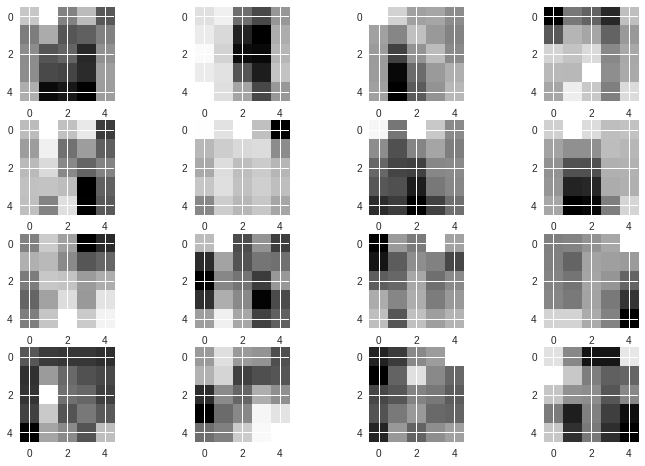

In [0]:
#https://www.codeastar.com/visualize-convolutional-neural-network/
weight_conv2d_2 = model.layers[3].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.38  0.62  0.08  0.32 -0.11]
 [ 0.05  0.26 -0.12 -0.07  0.07]
 [ 0.12 -0.12 -0.05 -0.31  0.14]
 [ 0.12 -0.17 -0.19 -0.31  0.2 ]
 [ 0.27 -0.45 -0.39 -0.49  0.19]]

[[-0.05  0.08 -0.98 -1.28 -0.64]
 [ 0.04 -0.11 -1.59 -1.88 -0.47]
 [ 0.16 -0.15 -1.77 -1.8  -0.39]
 [ 0.04 -0.04 -1.18 -1.64 -0.28]
 [ 0.2  -0.06 -0.53 -1.29 -0.64]]

[[ 3.30e-01  1.81e-01  2.22e-02  3.77e-02 -4.58e-02]
 [ 2.33e-02 -6.59e-02  1.23e-01 -2.19e-03 -7.13e-02]
 [ 2.91e-03 -2.90e-01 -2.34e-02  1.09e-01 -5.09e-02]
 [ 5.90e-03 -4.74e-01 -1.51e-01 -1.57e-04  6.93e-02]
 [ 1.85e-02 -5.02e-01 -2.03e-01 -1.97e-02  9.68e-02]]

[[-0.67 -0.18 -0.27 -0.5   0.11]
 [-0.3   0.07  0.01 -0.27 -0.05]
 [ 0.19  0.12  0.22 -0.11  0.02]
 [ 0.08  0.08  0.37 -0.09  0.02]
 [ 0.01  0.3   0.14 -0.15  0.22]]

[[ 0.04  0.35  0.06  0.25 -0.54]
 [-0.1   0.28 -0.3  -0.1  -0.38]
 [ 0.04  0.18 -0.19 -0.36 -0.21]
 [ 0.07  0.08  0.05 -0.82 -0.37]
 [ 0.06 -0.21  0.21 -0.82 -0.41]]

[[ 0.35  0.2   0.36  0.02 -1.  ]
 [-0.02  0.09  0.15  0.17 -0.26]